In [6]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [18]:
class BlackHole:
    def __init__(self, mass):
        self.mass = mass  # mass in kilograms
        self.c = 299792458  # speed of light in m/s
        self.G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2

    def SzwarzchildRadius(self, M):
        """
        Calculate the Schwarzschild radius for a given mass M.

        Parameters:
        M : float
            Mass of the object (in kilograms).

        Returns:
        r_s : float
            Schwarzschild radius (in meters).
        """
        c = self.c
        G = self.G # gravitational constant in m^3 kg^-1 s^-2
        r_s = 2 * G * M / c**2
        return r_s


    def SzwarzchildMetric(self, M, r, theta, phi):
        """
        Returns the Schwarzschild metric tensor components for a given mass M
        and spherical coordinates (r, theta, phi), including the speed of light c.

        Parameters:
        M : float
            Mass of the central object (in geometric units).
        r : float
            Radial coordinate.
        theta : float
            Polar angle (in radians).
        phi : float
            Azimuthal angle (in radians).

        Returns:
        g : np.ndarray
            4x4 numpy array representing the Schwarzschild metric tensor.
        """
        g = np.zeros((4, 4))
        
        # Metric components
        g[0, 0] = -(1 - self.SzwarzchildRadius(M) / r) * self.c**2
        g[1, 1] = 1 / (1 - self.SzwarzchildRadius(M)/r)
        g[2, 2] = r**2
        g[3, 3] = r**2 * np.sin(theta)**2
        
        return g
    def InverseMetric(self, M, r, theta, phi):
        """
        Returns the inverse of the Schwarzschild metric tensor components for a given mass M
        and spherical coordinates (r, theta, phi), including the speed of light c.

        Parameters:
        M : float
            Mass of the central object (in geometric units).
        r : float
            Radial coordinate.
        theta : float
            Polar angle (in radians).
        phi : float
            Azimuthal angle (in radians).

        Returns:
        g_inv : np.ndarray
            4x4 numpy array representing the inverse Schwarzschild metric tensor.
        """
        g_inv = np.zeros((4, 4))
        
        # Inverse metric components
        g_inv[0, 0] = -1 / ((1 - self.SzwarzchildRadius(M)/r) * self.c**2)
        g_inv[1, 1] = 1 - self.SzwarzchildRadius(M) / r
        g_inv[2, 2] = 1 / r**2
        g_inv[3, 3] = 1 / (r**2 * np.sin(theta)**2)
        
        return g_inv
    
    def dSzwarzchildMetricdr(self, M, r, theta, phi):
        """
        Calculate the radial derivative of the Schwarzschild metric tensor components.

        Parameters:
        M : float
            Mass of the central object (in geometric units).
        r : float
            Radial coordinate.
        theta : float
            Polar angle (in radians).
        phi : float
            Azimuthal angle (in radians).

        Returns:
        dg_dr : np.ndarray
            4x4 numpy array representing the radial derivative of the Schwarzschild metric tensor.
        """
        dg_dr = np.zeros((4, 4))
        
        # Derivative of metric components with respect to r
        dg_dr[0, 0] = -self.SzwarzchildRadius(M) * self.c**2 / r**2
        dg_dr[1, 1] = self.SzwarzchildRadius(M) / (r**2 * (1 - self.SzwarzchildRadius(M)/r)**2)
        dg_dr[2, 2] = 2 * r
        dg_dr[3, 3] = 2 * r * np.sin(theta)**2
        
        return dg_dr
    def dSzwarzchildMetricdtheta(self, M, r, theta, phi):
        """
        Calculate the polar angle derivative of the Schwarzschild metric tensor components.

        Parameters:
        M : float
            Mass of the central object (in geometric units).
        r : float
            Radial coordinate.
        theta : float
            Polar angle (in radians).
        phi : float
            Azimuthal angle (in radians).

        Returns:
        dg_dtheta : np.ndarray
            4x4 numpy array representing the polar angle derivative of the Schwarzschild metric tensor.
        """
        dg_dtheta = np.zeros((4, 4))
        
        # Derivative of metric components with respect to theta
        dg_dtheta[3, 3] = 2 * r**2 * np.sin(theta) * np.cos(theta)
        
        return dg_dtheta
    

    def dSzwarzchildMetricdphi(self, M, r, theta, phi):
        """
        Calculate the azimuthal angle derivative of the Schwarzschild metric tensor components.

        Parameters:
        M : float
            Mass of the central object (in geometric units).
        r : float
            Radial coordinate.
        theta : float
            Polar angle (in radians).
        phi : float
            Azimuthal angle (in radians).

        Returns:
        dg_dphi : np.ndarray
            4x4 numpy array representing the azimuthal angle derivative of the Schwarzschild metric tensor.
        """
        dg_dphi = np.zeros((4, 4))
        
        # Derivative of metric components with respect to phi
        # Note: The Schwarzschild metric does not depend on phi, so all derivatives are zero.
        
        return dg_dphi
    
    def dSzwarzchildMetricdt(self, M, r, theta, phi):
        """
        Calculate the time derivative of the Schwarzschild metric tensor components.

        Parameters:
        M : float
            Mass of the central object (in geometric units).
        r : float
            Radial coordinate.
        theta : float
            Polar angle (in radians).
        phi : float
            Azimuthal angle (in radians).

        Returns:
        dg_dt : np.ndarray
            4x4 numpy array representing the time derivative of the Schwarzschild metric tensor.
        """
        dg_dt = np.zeros((4, 4))
        
        # Derivative of metric components with respect to time
        # Note: The Schwarzschild metric does not depend on time, so all derivatives are zero.
        
        return dg_dt


    def ChristoffelSymbols(self, M, r, theta, phi):
        """
        Γ^mu_{nu sigma} for Schwarzschild in (t, r, theta, phi) = (0,1,2,3).
        Returns Gamma[mu, nu, sigma].
        """
        # metrics (diagonal for Schwarzschild)
        g     = self.SzwarzchildMetric(M, r, theta, phi)      # 4x4
        g_inv = self.InverseMetric(M, r, theta, phi)            # 4x4

        # partial derivatives of g_{lam,sig}
        dg_dt     = self.dSzwarzchildMetricdt(M, r, theta, phi)     # all zeros for Schwarzschild
        dg_dr     = self.dSzwarzchildMetricdr(M, r, theta, phi)
        dg_dtheta = self.dSzwarzchildMetricdtheta(M, r, theta, phi)
        dg_dphi   = self.dSzwarzchildMetricdphi(M, r, theta, phi)   # zeros for Schwarzschild

        # map coordinate index -> derivative tensor
        D = {0: dg_dt, 1: dg_dr, 2: dg_dtheta, 3: dg_dphi}

        Gamma = np.zeros((4, 4, 4), dtype=float)

        for mu in range(4):
            for nu in range(4):
                for sigma in range(4):
                    s = 0.0
                    for lam in range(4):
                        # ∂_ν g_{λσ}
                        d_nu = D[nu][lam, sigma]
                        # ∂_σ g_{λν}
                        d_sig = D[sigma][lam, nu]
                        # ∂_λ g_{νσ}
                        d_lam = D[lam][nu, sigma]
                        s += g_inv[mu, lam] * (d_nu + d_sig - d_lam)
                    Gamma[mu, nu, sigma] = 0.5 * s

        # optional sanity: symmetry in lower indices
        # assert np.allclose(Gamma, np.transpose(Gamma, (0,2,1)))

        return Gamma
    
    def GeodesicEquations(self, M, r, theta, phi, u):
        """
        Compute the right-hand side of the geodesic equations in Schwarzschild spacetime.

        Parameters:
        M : float
            Mass of the central object (in geometric units).
        r : float
            Radial coordinate.
        theta : float
            Polar angle (in radians).
        phi : float
            Azimuthal angle (in radians).
        u : np.ndarray
            4-velocity vector [u^t, u^r, u^theta, u^phi].

        Returns:
        du_dlambda : np.ndarray
            Derivative of the 4-velocity with respect to the affine parameter lambda.
        """
        # Get Christoffel symbols
        Gamma = self.ChristoffelSymbols(M, r, theta, phi)

        # Initialize derivative of 4-velocity
        du_dlambda = np.zeros(4)

        # Compute du^mu/dlambda = -Γ^mu_{nu sigma} u^nu u^sigma
        for mu in range(4):
            s = 0.0
            for nu in range(4):
                for sigma in range(4):
                    s += -Gamma[mu, nu, sigma] * u[nu] * u[sigma]
            du_dlambda[mu] = s

        return du_dlambda
    
    def rhs(self, lmbda, y, M):
        x = y[:4]
        u = y[4:]
        t, r, th, ph = x
        Gamma = self.ChristoffelSymbols(M, r, th, ph)
        a = np.empty(4)
        for mu in range(4):
            a[mu] = -np.einsum('ab,ab->', Gamma[mu], np.outer(u, u))
        return np.hstack((u, a))

    def horizon_event(self, lmbda, y, M):
        r = y[1]
        return r - 2.0*M
    
    def simulate_geodesic(self, M, initial_position, initial_velocity, num_steps, step_size):
        """
        Simulate the geodesic motion of a particle in Schwarzschild spacetime using scipy.integrate.solve_ivp.
        Parameters:
        M : float
            Mass of the central object (in geometric units).
        initial_position : np.ndarray
            Initial position vector [t, r, theta, phi]. t is often set to 0.
        initial_velocity : np.ndarray
            Initial 4-velocity vector [u^t, u^r, u^theta, u^phi].
        num_steps : int
            Number of integration steps.
        step_size : float
            Step size for the integration (in affine parameter lambda).
        Returns:
        trajectory : np.ndarray
            Array of shape (num_steps, 4) containing the trajectory of the particle.
        """
        y0 = np.hstack((initial_position, initial_velocity))
        lam_span = (0, num_steps * step_size)
        def event(lmbda, y):
            return self.horizon_event(lmbda, y, M)
        event.terminal = True
        event.direction = -1
        sol = solve_ivp(
            fun=lambda lmbda, y: self.rhs(lmbda, y, M),
            t_span=lam_span,
            y0=y0,
            method="DOP853",
            rtol=1e-12,
            atol=1e-15,
            max_step=step_size,
            dense_output=True,
            events=event
        )
        trajectory = sol.y[:4].T  # shape (n_points, 4)
        return trajectory
    

if __name__ == "__main__":
    # Example usage
    bh = BlackHole(mass=1)  # Mass of the Earth in kg
    bh.c = 1
    bh.G = 1
    M = bh.mass
    initial_position = np.array([0.0, 2 * bh.SzwarzchildRadius(M), np.pi/2, 0.0])  # [t, r, theta, phi]
    initial_velocity = np.array([1.0, +0.01, 0.124, 0.03])  # [u^t, u^r, u^theta, u^phi]
    num_steps = 10e3
    step_size = 0.4

    trajectory = bh.simulate_geodesic(M, initial_position, initial_velocity, num_steps, step_size)
    print(trajectory)

[[0.00000000e+00 4.00000000e+00 1.57079633e+00 0.00000000e+00]
 [2.39542629e-03 4.00002396e+00 1.57109336e+00 7.18625757e-05]
 [1.10560494e-02 4.00011064e+00 1.57216726e+00 3.31677104e-04]
 ...
 [2.15927787e+03 3.10411208e+01 1.21720132e+00 2.20805680e+01]
 [2.15949164e+03 3.10745857e+01 1.21638189e+00 2.20807942e+01]
 [2.15952027e+03 3.10790656e+01 1.21627228e+00 2.20808245e+01]]


In [22]:
np.save('trajectory.npy', trajectory)



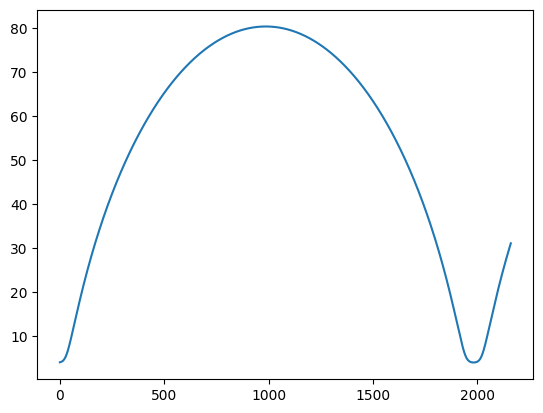

In [20]:
plt.plot(trajectory[:, 0], trajectory[:, 1] )

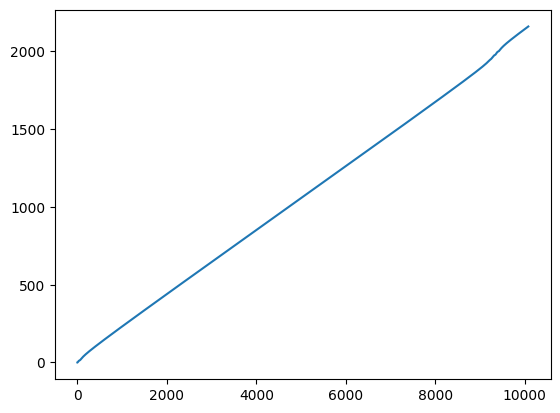

In [21]:
plt.plot(trajectory[:, 0])

In [10]:
# Fast, interactive viewer: Plotly FigureWidget + ipywidgets (no heavy animation frames)
# Rotate with mouse, scroll to zoom, pan with right-drag.

# If needed (first time in a fresh env):
# !pip install plotly ipywidgets

import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from ipywidgets import IntSlider, Play, jslink, HBox, VBox, Checkbox, Label

# Make sure Plotly renders inside the notebook
pio.renderers.default = "notebook_connected"

def _spherical_to_cartesian(r, th, ph):
    x = r * np.sin(th) * np.cos(ph)
    y = r * np.sin(th) * np.sin(ph)
    z = r * np.cos(th)
    return x, y, z

def _horizon_sphere(radius, n_theta=36, n_phi=72):
    th = np.linspace(0, np.pi, n_theta)
    ph = np.linspace(0, 2*np.pi, n_phi)
    TH, PH = np.meshgrid(th, ph, indexing="ij")
    R = radius * np.ones_like(TH)
    X, Y, Z = _spherical_to_cartesian(R, TH, PH)
    return X, Y, Z

def visualize_geodesic_widget(trajectory, bh, M, tail_length=1000, show_horizon=True):
    """
    trajectory: (N,4) array [t, r, theta, phi]
    bh: your BlackHole instance
    M: mass parameter
    tail_length: how many previous samples to show behind the particle
    show_horizon: draw r = r_s sphere
    """
    r   = trajectory[:,1]
    th  = trajectory[:,2]
    ph  = trajectory[:,3]
    x, y, z = _spherical_to_cartesian(r, th, ph)
    N = len(x)
    if N < 2:
        raise ValueError("Trajectory must have at least 2 points.")

    # Figure limits
    rmax = float(np.max(np.abs([x, y, z])))
    lim = 1.05 * rmax if np.isfinite(rmax) and rmax > 0 else 1.0

    # Base figure as FigureWidget (enables ultra-fast updates)
    fig = go.FigureWidget(data=[], layout=go.Layout(
        title=f"Geodesic around Schwarzschild BH",
        scene=dict(
            xaxis=dict(title="x", range=[-lim, lim], zeroline=False),
            yaxis=dict(title="y", range=[-lim, lim], zeroline=False),
            zaxis=dict(title="z", range=[-lim, lim], zeroline=False),
            aspectmode="data",
            dragmode="orbit"
        ),
        showlegend=True,
        margin=dict(l=0, r=0, t=50, b=0)
    ))

    # Full path (faint)
    path_trace = go.Scatter3d(
        x=x, y=y, z=z,
        mode="lines",
        line=dict(width=2),
        opacity=0.35,
        name="Path"
    )
    fig.add_trace(path_trace)

    # Event horizon
    rs = bh.SzwarzchildRadius(M)
    horizon_trace = None
    if show_horizon and np.isfinite(rs) and rs > 0:
        Xs, Ys, Zs = _horizon_sphere(rs)
        horizon_trace = go.Surface(
            x=Xs, y=Ys, z=Zs,
            showscale=False,
            opacity=0.25,
            name=f"Event horizon (r_s={rs:.4g})",
            hoverinfo="skip"
        )
        fig.add_trace(horizon_trace)

    # Tail (recent segment)
    tail_trace = go.Scatter3d(
        x=x[:1], y=y[:1], z=z[:1],
        mode="lines",
        line=dict(width=6),
        name="Recent segment"
    )
    fig.add_trace(tail_trace)

    # Particle (moving point)
    particle_trace = go.Scatter3d(
        x=[x[0]], y=[y[0]], z=[z[0]],
        mode="markers",
        marker=dict(size=6),
        name="Particle"
    )
    fig.add_trace(particle_trace)

    # Controls
    slider = IntSlider(value=0, min=0, max=N-1, step=1, description='Step', continuous_update=True, readout=True)
    play = Play(interval=20, value=0, min=0, max=N-1, step=1, description="Press play")
    jslink((play, 'value'), (slider, 'value'))

    # Optional toggle for horizon (so you can hide it if it slows rendering on weak GPUs)
    toggle_horizon = Checkbox(value=bool(horizon_trace is not None), description='Show horizon', indent=False)

    def on_slider_change(change):
        i = int(change['new'])
        j0 = max(0, i - tail_length)

        # Update tail
        with fig.batch_update():
            tail_trace.x = x[j0:i+1]
            tail_trace.y = y[j0:i+1]
            tail_trace.z = z[j0:i+1]
            # Update particle
            particle_trace.x = (x[i],)
            particle_trace.y = (y[i],)
            particle_trace.z = (z[i],)

    slider.observe(on_slider_change, names='value')

    def on_toggle_horizon(change):
        if horizon_trace is None:
            return
        horizon_trace.visible = change['new']

    toggle_horizon.observe(on_toggle_horizon, names='value')

    display(VBox([fig, HBox([play, slider, toggle_horizon])]))

# —— Use it like this ——
visualize_geodesic_widget(trajectory, bh, M, tail_length=800, show_horizon=True)


    'data': [{'line': {'width': 2},
              'mode': 'lines',
             …

In [5]:
np.save('trajectory.npy', trajectory)

ValueError: Spatial components are too large; no timelike normalization possible.

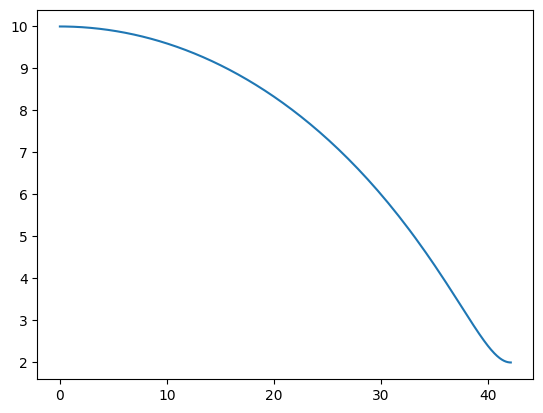

In [157]:
plt.plot(trajectory[:, 0], trajectory[:, 1] )

In [ ]:
trajectory[:, 1][]

array([6.67430000e-10, 6.67421671e-10, 6.66816983e-10, 6.62214245e-10,
       6.53859120e-10, 6.42547631e-10, 6.28636057e-10, 6.12571407e-10,
       5.94833110e-10, 5.75881231e-10, 5.56131465e-10, 5.35945016e-10,
       5.15626889e-10, 4.95428586e-10, 4.75552853e-10, 4.58188254e-10,
       4.39550914e-10, 4.23310506e-10, 4.06008947e-10, 3.91081517e-10,
       3.75268010e-10, 3.61719747e-10, 3.47430012e-10, 3.35246661e-10,
       3.22441230e-10, 3.11558937e-10, 3.00153199e-10, 2.90480427e-10,
       2.80365813e-10, 2.71798229e-10, 2.62856468e-10, 2.55286591e-10,
       2.47398805e-10, 2.40721929e-10, 2.33774085e-10, 2.27891654e-10,
       2.21777554e-10, 2.16598861e-10, 2.11221520e-10, 2.06664345e-10,
       2.01936370e-10, 1.97926967e-10, 1.93770331e-10, 1.89843987e-10,
       1.86548593e-10, 1.83135377e-10, 1.79911390e-10, 1.76897601e-10,
       1.74082213e-10, 1.71452078e-10, 1.68994787e-10, 1.66698766e-10,
       1.64553228e-10, 1.62548119e-10, 1.60674071e-10, 1.58922355e-10,
      

In [110]:
t_arr

array([0.00000000e+00, 4.83026491e-09, 4.79075051e-08, 1.51608596e-07,
       2.52694167e-07, 3.47482301e-07, 4.35133712e-07, 5.15586409e-07,
       5.89259635e-07, 6.56732524e-07, 7.18587215e-07, 7.75358328e-07,
       8.27523771e-07, 8.75508161e-07, 9.19689087e-07, 9.60403308e-07,
       9.97952192e-07, 1.03260633e-06, 1.06460940e-06, 1.09418148e-06,
       1.12152179e-06, 1.14681109e-06, 1.17021372e-06, 1.19187933e-06,
       1.21194448e-06, 1.23053391e-06, 1.24776174e-06, 1.26373250e-06,
       1.27854208e-06, 1.29227846e-06, 1.30502250e-06, 1.31684858e-06,
       1.32782514e-06, 1.33801522e-06, 1.34747694e-06, 1.35626387e-06,
       1.36442550e-06, 1.37200747e-06, 1.37905199e-06, 1.38559805e-06,
       1.39168170e-06, 1.39733630e-06, 1.40259272e-06, 1.40747953e-06,
       1.41202319e-06, 1.41624822e-06, 1.42017733e-06, 1.42383157e-06,
       1.42723045e-06, 1.43039209e-06, 1.43333327e-06, 1.43606956e-06,
       1.43861542e-06, 1.44098427e-06, 1.44318855e-06, 1.44523983e-06,
      

In [66]:
initial_velocity = np.array([1, 1000,  0, 0.0])
np.sqrt(-np.multiply(bh.SzwarzchildMetric(bh.mass, 1000*bh.SzwarzchildRadius(bh.mass), np.pi/2, 0), initial_velocity).sum()) / bh.c

np.float64(0.9994998749374554)

In [92]:
trajectory[:, 0]

array([0.00000000e+00, 9.63917327e-08, 1.89557898e-07, 2.75546645e-07,
       3.54368883e-07, 4.26540127e-07, 4.92661284e-07, 5.53306640e-07,
       6.08995442e-07, 6.60190004e-07, 7.07301051e-07, 7.50694229e-07,
       7.90696112e-07, 8.27599374e-07, 8.61667139e-07, 8.93136662e-07,
       9.22222427e-07, 9.49118796e-07, 9.74002267e-07, 9.97033427e-07,
       1.01835864e-06, 1.03811151e-06, 1.05641418e-06, 1.07337845e-06,
       1.08910678e-06, 1.10369317e-06, 1.11722395e-06, 1.12977846e-06,
       1.14142971e-06, 1.15224491e-06, 1.16228599e-06, 1.17161004e-06,
       1.18026974e-06, 1.18831370e-06, 1.19578683e-06, 1.20273062e-06,
       1.20918343e-06, 1.21518072e-06, 1.22075533e-06, 1.22593762e-06,
       1.23075573e-06, 1.23523569e-06, 1.23940165e-06, 1.24327597e-06,
       1.24687937e-06, 1.25023109e-06, 1.25334895e-06, 1.25624949e-06,
       1.25894805e-06, 1.26145888e-06, 1.26379518e-06, 1.26596923e-06,
       1.26799243e-06, 1.26987536e-06, 1.27162784e-06, 1.27325899e-06,
      

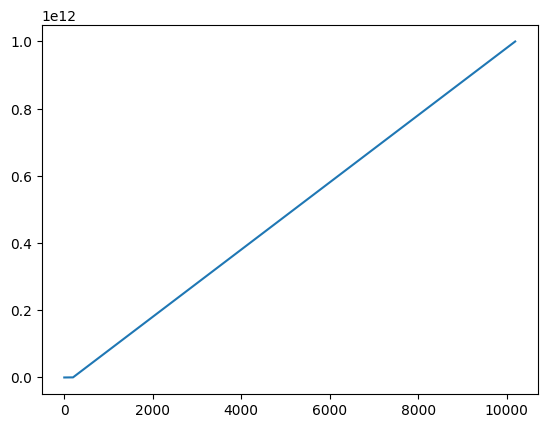

In [97]:
plt.plot(trajectory[:, 1])

In [21]:
trajectory[:, 1][0]

np.float64(0.8869805825435334)

In [15]:
bh.SzwarzchildRadius(M)

0.008869805825435334

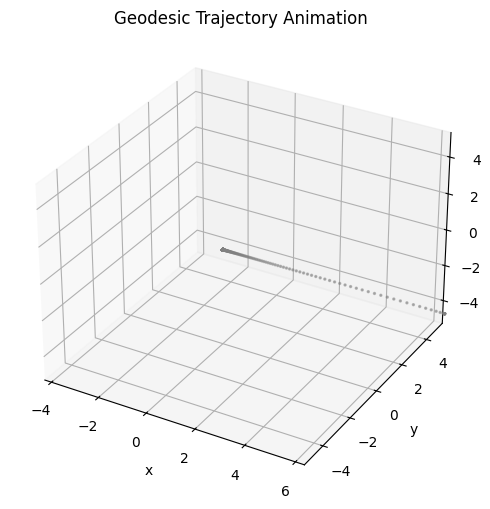

interactive(children=(IntSlider(value=1, description='Step', max=362, min=1), Output()), _dom_classes=('widget…

<function __main__.update(step)>

In [28]:
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

r = trajectory[:, 1]
theta = trajectory[:, 2]
phi = trajectory[:, 3]

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Plot all points for reference
ax.scatter(x, y, z, s=2, color='gray', alpha=0.5)
line, = ax.plot([], [], [], lw=2, color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Geodesic Trajectory Animation')

# Set axis limits around the mean position
center = [np.mean(x), np.mean(y), np.mean(z)]
span = max(np.ptp(x), np.ptp(y), np.ptp(z)) * 0.6
ax.set_xlim(center[0] - span, center[0] + span)
ax.set_ylim(center[1] - span, center[1] + span)
ax.set_zlim(center[2] - span, center[2] + span)

slider = widgets.IntSlider(min=1, max=len(x), step=1, value=1, description='Step')

# Update function for slider
def update(step):
    line.set_data(x[:step], y[:step])
    line.set_3d_properties(z[:step])
    fig.canvas.draw_idle()

widgets.interact(update, step=slider)
